In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [17]:
def read_frames(csv_files):
    combined_df = pd.DataFrame()  # empty data frame
    for csv_file in csv_files:
        df = pd.read_csv(csv_file, index_col=0)
        combined_df = pd.concat([combined_df, df])

    return combined_df

In [18]:
# Get a list of all CSV files in a directory
station_dat = '/home/ck/DIR/cornkle/data/nflics/core_gauge_comparison_GMet/tables/'
core_files = sorted(glob.glob(station_dat + 'core_*.csv'))   # station file location
tir_files = sorted(glob.glob(station_dat + 'tir_*.csv'))  # station file location

# Create an empty dataframe to store the combined data
combined_core= read_frames(core_files)
combined_tir= read_frames(tir_files)

In [19]:
combined_core.head()

,NAV,WA,TLE,YEN,BOL,K.KRA,WEN,SNY,KSI,ABE,...,AKA,AKU,KOF,A. ODA,ADA,TEM,ACC,SAL,TDI,AXI
2004-01-28 15:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-28 06:30:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-24 10:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-30 22:15:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004-01-23 22:45:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
combined_tir.head()

,NAV,WA,TLE,YEN,BOL,K.KRA,WEN,SNY,KSI,ABE,...,AKA,AKU,KOF,A. ODA,ADA,TEM,ACC,SAL,TDI,AXI
2004-01-28 15:00:00,38,37,41,38,37,23,31,29,25,23,...,23,-12,12,9,9,21,25,23,21,-22
2004-01-28 06:30:00,16,16,15,11,17,16,17,13,3,2,...,5,12,11,13,7,0,2,12,12,13
2004-01-24 10:00:00,34,31,33,30,32,25,24,25,24,23,...,19,24,23,21,19,16,23,21,22,22
2004-01-30 22:15:00,18,17,19,18,18,21,17,19,20,20,...,21,21,19,20,22,22,22,22,22,22
2004-01-23 22:45:00,7,18,10,13,4,13,4,-11,0,1,...,19,20,16,16,20,20,20,15,19,18


In [27]:
np.unique(combined_core['NAV'].values)

array([0, 1])

In [45]:
combined_tir.keys()

Index(['NAV', 'WA', 'TLE', 'YEN', 'BOL', 'K.KRA', 'WEN', 'SNY', 'KSI', 'ABE',
       'HO', 'S.BEK', 'AKA', 'AKU', 'KOF', 'A. ODA', 'ADA', 'TEM', 'ACC',
       'SAL', 'TDI', 'AXI'],
      dtype='object')

In [47]:
combined_tir.size

14871824

In [48]:
combined_core.size

14871824

In [53]:
# calculate frequency of tir below a threshold 

def calc_treshReached(tir, thresh):
    return np.sum(np.array(tir)<thresh)/np.sum(np.isfinite(tir))

In [69]:
# calculate frequency of tir below a threshold 

def calc_treshAndCore(tir, thresh, core):
    return np.sum((np.array(tir)<thresh) & (np.array(core)>0))/np.sum(np.isfinite(tir))

In [73]:
# calculate frequency of tir below a threshold 

def calc_CoreAtThreshold(tir, thresh, core):
    return np.sum((np.array(tir)<thresh) & (np.array(core)>0))/np.sum(tir<thresh)

In [55]:
# calculate probability of core given some cloud top temperature (tir)

def percentile(dat, wav, thresh, perc):
    pval = np.percentile(wav, perc)
    dats = np.array(dat)[np.array(wav)>=pval]
    return np.sum(dats>thresh)/np.sum(np.isfinite(dats))

In [56]:
treached = []
tnames = []
for kk in combined_tir.keys():
    try:
        dat = combined_tir[kk].values
    except:
        dat = combined_tir[kk]
        
    dat_cloud = dat[dat<-10]
    cc = calc_treshReached(dat_cloud,-40)
    print(cc, kk)
    treached.append(cc)
    tnames.append(kk)

0.3317473606828531 NAV
0.34833937169506113 WA
0.34053570763327495 TLE
0.3597232963092011 YEN
0.34233990561286354 BOL
0.35880856728552074 K.KRA
0.36688728304180457 WEN
0.36278259651825334 SNY
0.37864513234634367 KSI
0.3751198446971198 ABE
0.357491001153919 HO
0.372385082695266 S.BEK
0.3068586953228364 AKA
0.3414136015727892 AKU
0.36400725294650954 KOF
0.39098561878307553 A. ODA
0.28854918452008865 ADA
0.2892651090235482 TEM
0.29861488937250635 ACC
0.3144008753517038 SAL
0.32497672488250273 TDI
0.3411226585350675 AXI


Text(0.5, 1.0, 'Fraction of cloud that reaches < -40C at station location')

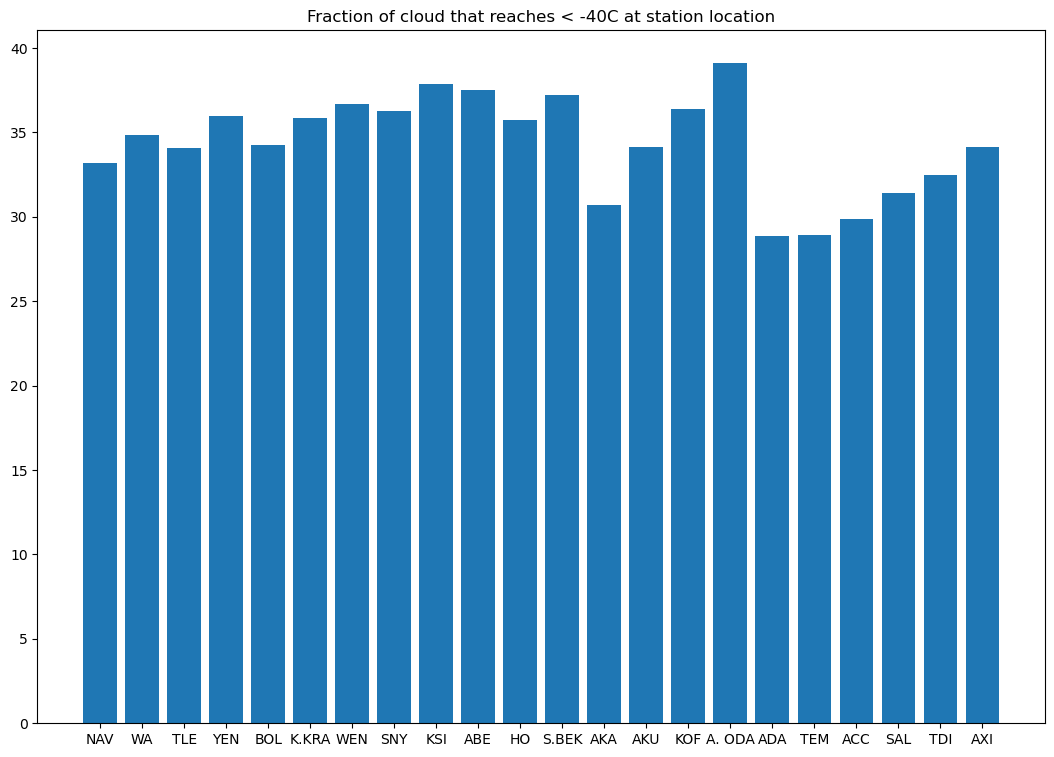

In [57]:
plt.figure(figsize=(13,9))
plt.bar(tnames,np.array(treached)*100)
plt.title('Fraction of cloud that reaches < -40C at station location')

In [62]:
treached = []
tnames = []
for kk in combined_tir.keys():
    try:
        dat = combined_tir[kk].values
        core = combined_core[kk].values
    except:
        dat = combined_tir[kk]
        core = combined_core[kk]
        
    dat_cloud = dat[dat<-10]
    core_cloud = core[dat<-10]
    cc = calc_treshAndCore(dat_cloud,-40, core_cloud)
    print(cc, kk)
    treached.append(cc)
    tnames.append(kk)

0.02962978089073125 NAV
0.03290985971451004 WA
0.029532839101441718 TLE
0.033636155042448865 YEN
0.029454009587942323 BOL
0.031045712791499275 K.KRA
0.03584453299115283 WEN
0.03768828827251801 SNY
0.043600352258943556 KSI
0.03888910898934274 ABE
0.04289306443001567 HO
0.04268170796360191 S.BEK
0.024865421712300405 AKA
0.03410891183600237 AKU
0.04211330951238156 KOF
0.05064430909847693 A. ODA
0.021128601466159004 ADA
0.020795338540770564 TEM
0.020810663764961917 ACC
0.021024072171854764 SAL
0.02060548956265213 TDI
0.02415624286929284 AXI


Text(0.5, 1.0, 'Fraction of cloud that reaches < -40C and has a core at station location')

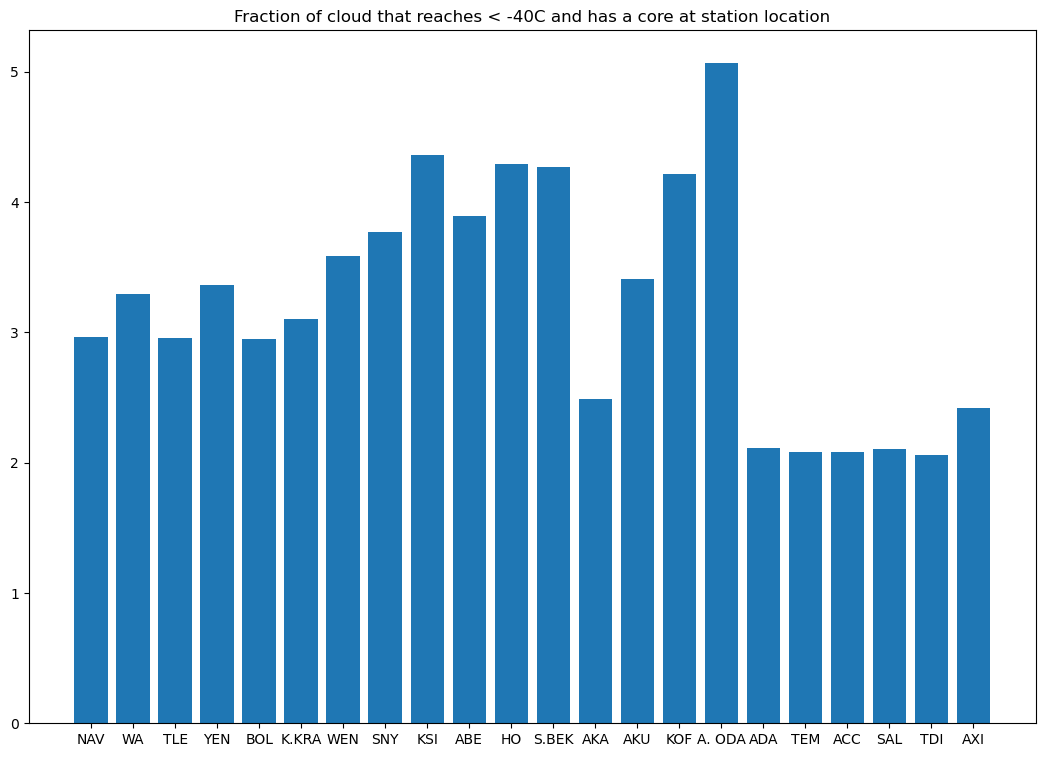

In [63]:
plt.figure(figsize=(13,9))
plt.bar(tnames,np.array(treached)*100)
plt.title('Fraction of cloud that reaches < -40C and has a core at station location')

In [74]:
treached = []
tnames = []
for kk in combined_tir.keys():
    try:
        dat = combined_tir[kk].values
        core = combined_core[kk].values
    except:
        dat = combined_tir[kk]
        core = combined_core[kk]
        
    dat_cloud = dat[dat<-10]
    core_cloud = core[dat<-10]
    
    p_list = []
    
    for tthreshs in range(-90,-10,2):
        cc = calc_CoreAtThreshold(dat_cloud,tthreshs, core_cloud)
        p_list.append(cc)
        
    treached.append(np.array(p_list))
    tnames.append(kk)

/tmp/ipykernel_32365/4230518960.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum((np.array(tir)<thresh) & (np.array(core)>0))/np.sum(tir<thresh)


Text(0.5, 0, 'Cloud top temperature (degC)')

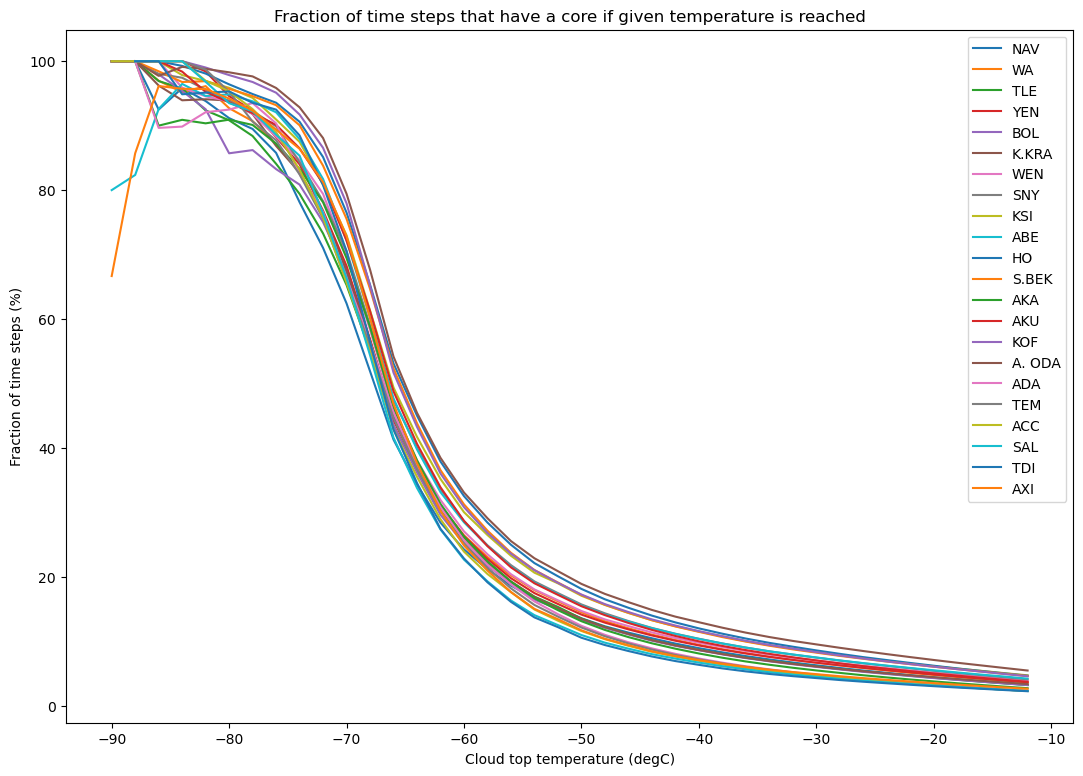

In [78]:
f = plt.figure(figsize=(13,9))
ax = f.add_subplot(111)
for ids,station_name in enumerate(tnames):
    ax.plot(np.arange(-90,-10,2), treached[ids]*100, label=station_name)

plt.legend()    

plt.title('Fraction of time steps that have a core if given temperature is reached')
plt.ylabel('Fraction of time steps (%)')
plt.xlabel('Cloud top temperature (degC)')